In [1]:
#pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams['figure.dpi']=250
sns.set_style('darkgrid')
%matplotlib inline


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/snehuuu28/Time_Series/main/AveargeTemp.csv", index_col=0, parse_dates=True)
df

,AvgTemp
DATE,
01-01-2014,40
02-01-2014,43
03-01-2014,41
04-01-2014,37
05-01-2014,31
...,...
26-12-2018,40
27-12-2018,39
28-12-2018,40


In [4]:
df['AvgTemp']

DATE
01-01-2014    40
02-01-2014    43
03-01-2014    41
04-01-2014    37
05-01-2014    31
              ..
26-12-2018    40
27-12-2018    39
28-12-2018    40
29-12-2018    42
30-12-2018    46
Name: AvgTemp, Length: 1821, dtype: int64

# Check Stationarity of the data

<Axes: xlabel='DATE'>

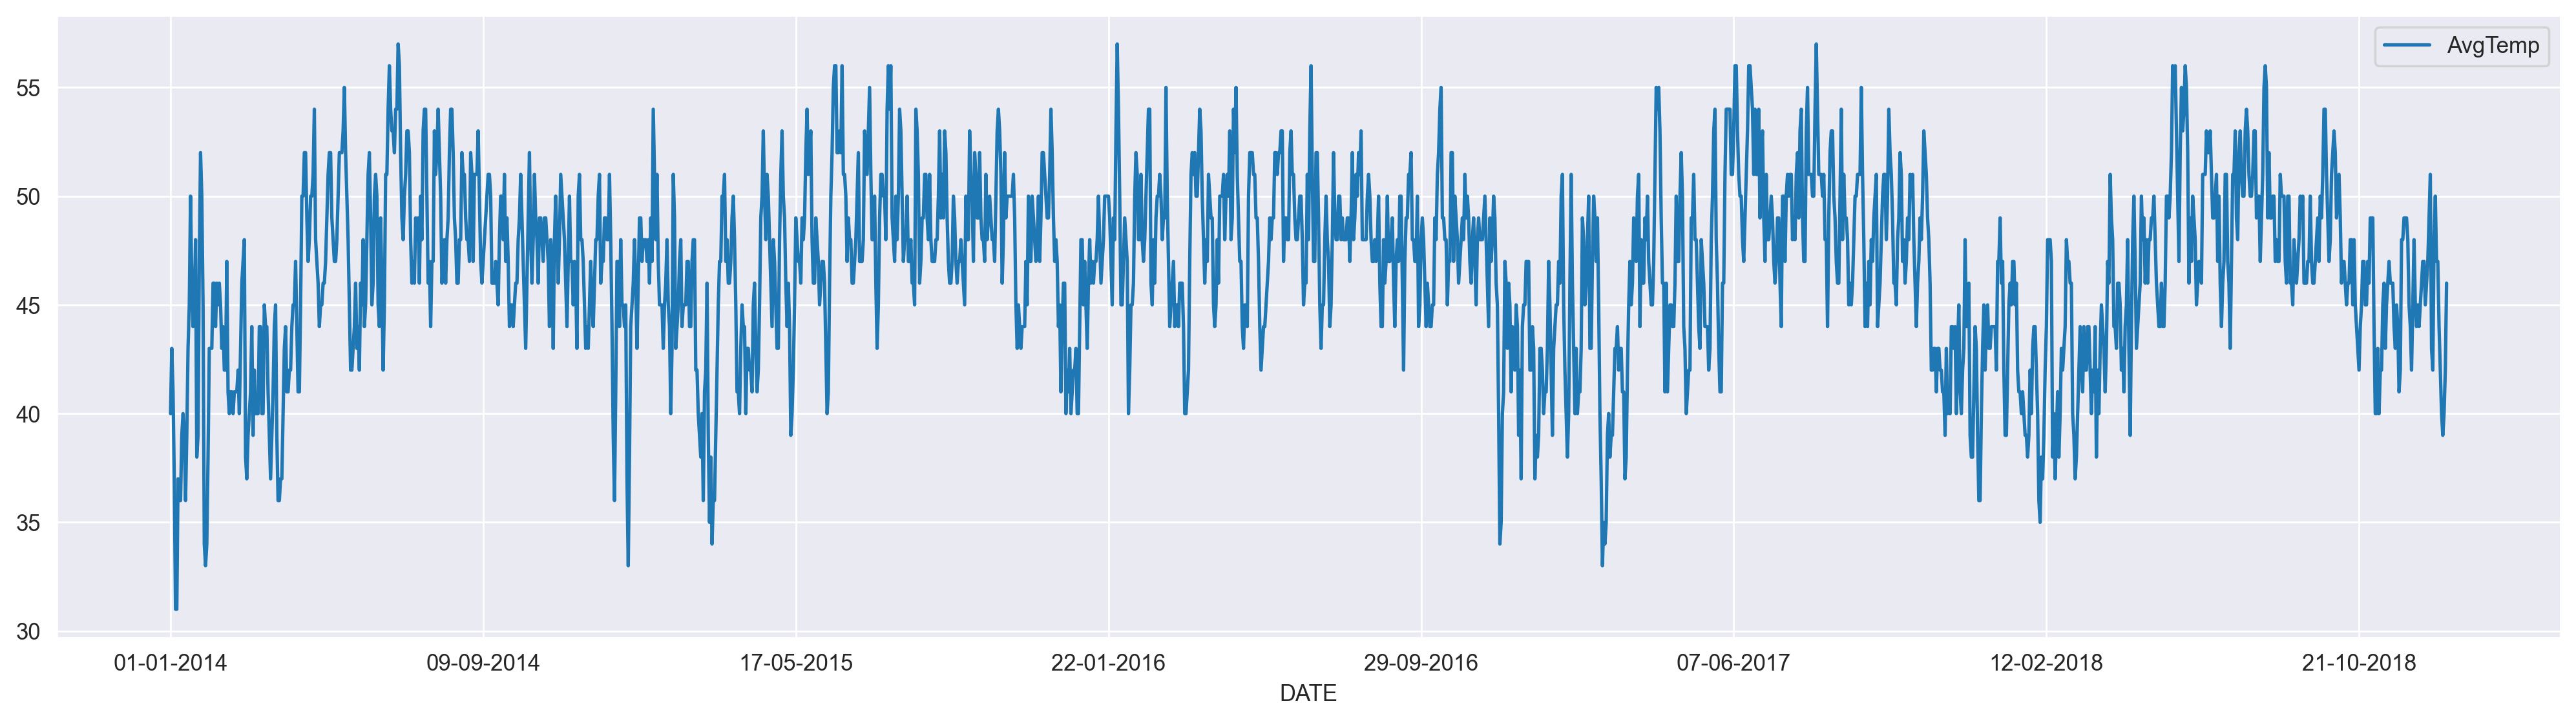

In [6]:
df.plot()

* We can see that it seems to have somewhat of a constant mean around 45. and the fluctuations also seem to be more or less the same. However to be sure if the data is stationary or not we will run adfuller test.

In [8]:
adfuller(df['AvgTemp'])[1]

8.67593748019951e-09

- Null Hypothesis : Data is Non Stationary
- Alternate Hypothesis : Data is Stationary
* If p <  0.05; Data is Stationary
* If p >  0.05; Data is not Stationary

- According the p-value , the dataset is stationary as the p value is less than alpha value.

# ARIMA Model Building

* ARIMA is composed of 3 terms(Auto-Regression(p) + Integrated(d) + Moving-Average(q))
* First, we need to find out the order of arima model

In [12]:
# find out the order of arima

In [13]:
order = auto_arima(df['AvgTemp'])

In [14]:
order

ARIMA(order=(1, 0, 5), scoring_args={}, suppress_warnings=True)

In [15]:
df.shape

(1821, 1)

In [16]:
# Split the Data

train = df.iloc[:-30]
test = df.iloc[-30:]

In [17]:
train

,AvgTemp
DATE,
01-01-2014,40
02-01-2014,43
03-01-2014,41
04-01-2014,37
05-01-2014,31
...,...
26-11-2018,49
27-11-2018,49
28-11-2018,49


In [18]:
train.shape

(1791, 1)

In [19]:
test

,AvgTemp
DATE,
01-12-2018,44
02-12-2018,42
03-12-2018,45
04-12-2018,48
05-12-2018,45
06-12-2018,44
07-12-2018,45
08-12-2018,44
09-12-2018,45


In [20]:
test.shape

(30, 1)

In [21]:
# ARIMA Model

In [22]:
model = ARIMA(train['AvgTemp'], order=(1,0,5)).fit()

# EValuating the Model

In [24]:
test

,AvgTemp
DATE,
01-12-2018,44
02-12-2018,42
03-12-2018,45
04-12-2018,48
05-12-2018,45
06-12-2018,44
07-12-2018,45
08-12-2018,44
09-12-2018,45


In [25]:
ypred = model.predict(start=1791, end = 1820)
ypred

1791    44.754109
1792    44.987795
1793    45.388741
1794    45.721545
1795    45.863733
1796    45.874126
1797    45.884370
1798    45.894466
1799    45.904417
1800    45.914225
1801    45.923891
1802    45.933419
1803    45.942809
1804    45.952063
1805    45.961185
1806    45.970175
1807    45.979036
1808    45.987770
1809    45.996377
1810    46.004861
1811    46.013222
1812    46.021463
1813    46.029586
1814    46.037591
1815    46.045481
1816    46.053258
1817    46.060923
1818    46.068477
1819    46.075923
1820    46.083261
Name: predicted_mean, dtype: float64

In [26]:
print(np.sqrt(mean_squared_error(test['AvgTemp'], ypred)))

3.0004638800104666
